In [13]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
from tqdm import tqdm

In [2]:
fname = '/work/mccleary_group/saha/simulated_data/sim_test4/b/out/sim_test4_b_annular_combined_with_truth.fits'
cat = Table.read(fname)

In [3]:
np.sum(cat["admom_flag"]==0)

50

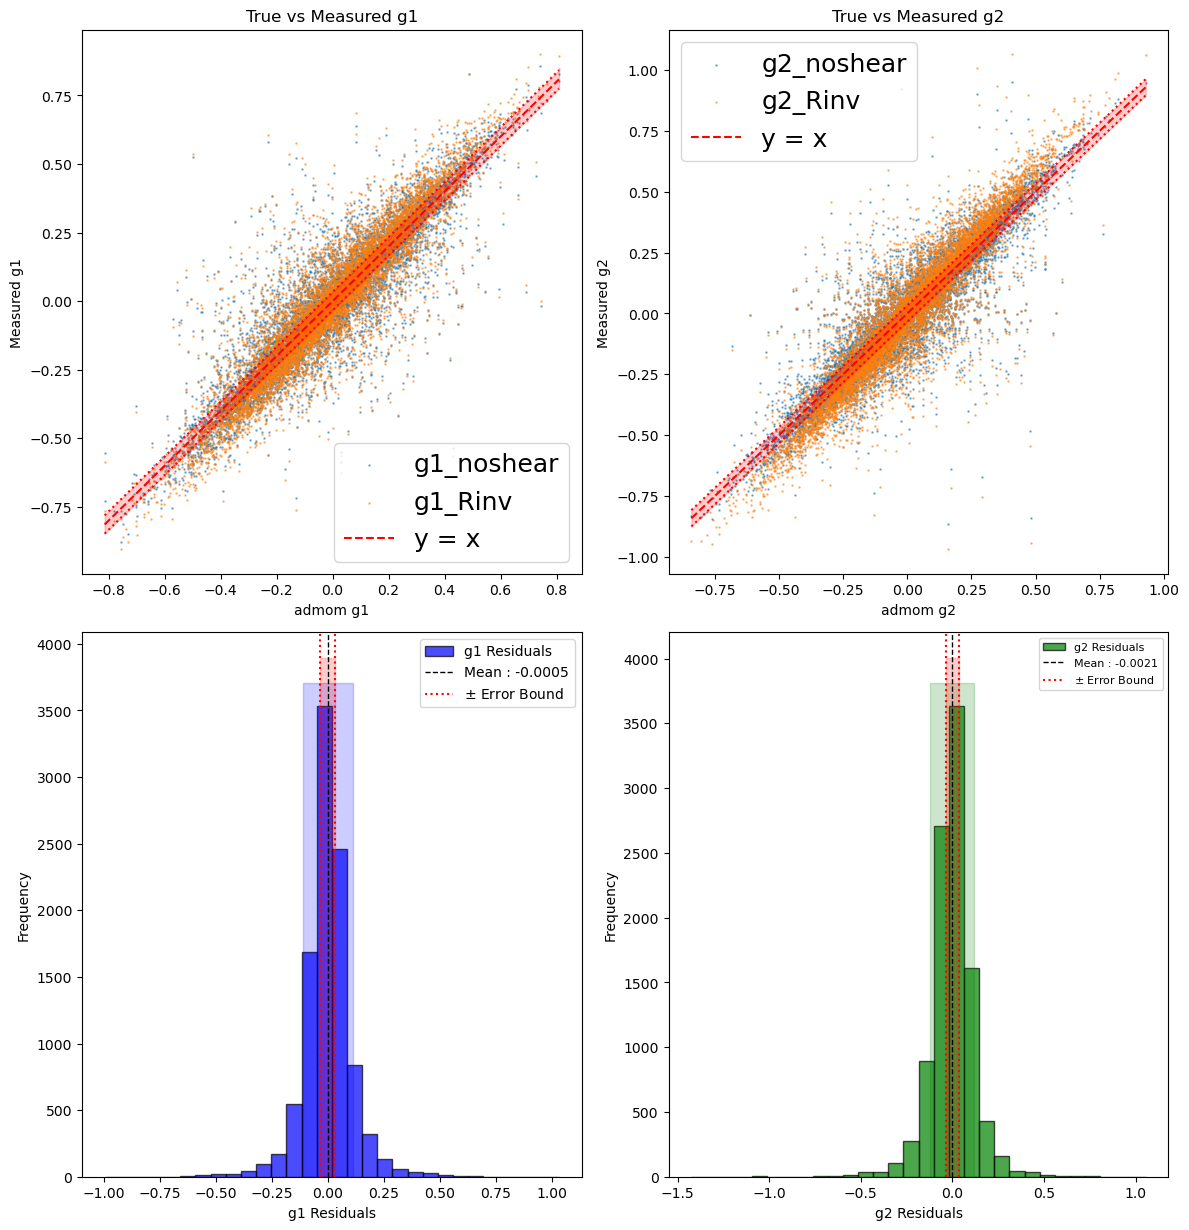

g1 Residuals: Mean = -0.0005, Std = 0.1115
g2 Residuals: Mean = -0.0021, Std = 0.1209


In [19]:
# Compute the min and max values for the line limits
g1_min = np.min(cat["admom_g1"])
g1_max = np.max(cat["admom_g1"])
g2_min = np.min(cat["admom_g2"])
g2_max = np.max(cat["admom_g2"])

g1_error_allowed = np.sqrt(np.median(cat["g_cov_noshear"][:,0,0]))
g2_error_allowed = np.sqrt(np.median(cat["g_cov_noshear"][:,1,1]))

# Scatter plot: True vs Measured g1
plt.figure(figsize=(12, 18))

# Plot for g1
plt.subplot(3, 2, 1)
plt.scatter(cat["admom_g1"], cat["g_noshear"][:,0], alpha=0.5, s=0.7, label="g1_noshear")
plt.scatter(cat["admom_g1"], cat["g1_Rinv"], alpha=0.5, s=0.7, label="g1_Rinv")

# y=x line
plt.plot([g1_min, g1_max], [g1_min, g1_max], 'r--', label="y = x")  

# Upper and lower bounds
plt.plot([g1_min, g1_max], [g1_min + g1_error_allowed, g1_max + g1_error_allowed], 'r:')
plt.plot([g1_min, g1_max], [g1_min - g1_error_allowed, g1_max - g1_error_allowed], 'r:')

# Optional: Shaded region for error range
plt.fill_between([g1_min, g1_max], [g1_min - g1_error_allowed, g1_max - g1_error_allowed], 
                 [g1_min + g1_error_allowed, g1_max + g1_error_allowed], color='red', alpha=0.2)

plt.xlabel("admom g1")
plt.ylabel("Measured g1")
plt.title("True vs Measured g1")
plt.legend(fontsize=18)

# Scatter plot: True vs Measured g2
plt.subplot(3, 2, 2)
plt.scatter(cat["admom_g2"], cat["g_noshear"][:,1], alpha=0.5, s=0.7, label="g2_noshear")
plt.scatter(cat["admom_g2"], cat["g2_Rinv"], alpha=0.5, s=0.7, label="g2_Rinv")

# y=x line
plt.plot([g2_min, g2_max], [g2_min, g2_max], 'r--', label="y = x")  

# Upper and lower bounds
plt.plot([g2_min, g2_max], [g2_min + g2_error_allowed, g2_max + g2_error_allowed], 'r:')
plt.plot([g2_min, g2_max], [g2_min - g2_error_allowed, g2_max - g2_error_allowed], 'r:')

# Optional: Shaded region for error range
plt.fill_between([g2_min, g2_max], [g2_min - g2_error_allowed, g2_max - g2_error_allowed], 
                 [g2_min + g2_error_allowed, g2_max + g2_error_allowed], color='red', alpha=0.2)

plt.xlabel("admom g2")
plt.ylabel("Measured g2")
#plt.ylim(-0.05, 0.06)
plt.title("True vs Measured g2")
plt.legend(fontsize=18)

g1_residual = cat["g1_Rinv"] - cat["admom_g1"]
g2_residual = cat["g2_Rinv"] - cat["admom_g2"]

# Histogram of residuals for g1
plt.subplot(3, 2, 3)
plt.hist(g1_residual, bins=30, color='blue', alpha=0.7, label='g1 Residuals', edgecolor='black')

# Mean line
plt.axvline(np.mean(g1_residual), color='black', linestyle='dashed', linewidth=1, label=f'Mean : {np.mean(g1_residual):.4f}')
plt.fill_betweenx([0, plt.gca().get_ylim()[1]], np.mean(g1_residual)-np.std(g1_residual), np.mean(g1_residual)+np.std(g1_residual), color='blue', alpha=0.2)
# Error bounds for residuals
plt.axvline(g1_error_allowed, color='red', linestyle='dotted', linewidth=1.5, label=r"$\pm$ Error Bound")
plt.axvline(-g1_error_allowed, color='red', linestyle='dotted', linewidth=1.5)

# Shaded error region
plt.fill_betweenx([0, plt.gca().get_ylim()[1]], -g1_error_allowed, g1_error_allowed, color='red', alpha=0.2)

plt.xlabel("g1 Residuals")
plt.ylabel("Frequency")
plt.legend()

# Histogram of residuals for g2
plt.subplot(3, 2, 4)
plt.hist(g2_residual, bins=30, color='green', alpha=0.7, label='g2 Residuals', edgecolor='black')

# Mean line
plt.axvline(np.mean(g2_residual), color='black', linestyle='dashed', linewidth=1, label=f'Mean : {np.mean(g2_residual):.4f}')

plt.fill_betweenx([0, plt.gca().get_ylim()[1]], np.mean(g2_residual)-np.std(g2_residual), np.mean(g2_residual)+np.std(g2_residual), color='green', alpha=0.2)

# Error bounds for residuals
plt.axvline(g2_error_allowed, color='red', linestyle='dotted', linewidth=1.5, label=r"$\pm$ Error Bound")
plt.axvline(-g2_error_allowed, color='red', linestyle='dotted', linewidth=1.5)

# Shaded error region
plt.fill_betweenx([0, plt.gca().get_ylim()[1]], -g2_error_allowed, g2_error_allowed, color='red', alpha=0.2)

plt.xlabel("g2 Residuals")
plt.ylabel("Frequency")
plt.legend(fontsize=8)

plt.tight_layout()
plt.show()

# Print Mean and Standard Deviation of Residuals
print(f"g1 Residuals: Mean = {np.mean(g1_residual):.4f}, Std = {np.std(g1_residual):.4f}")
print(f"g2 Residuals: Mean = {np.mean(g2_residual):.4f}, Std = {np.std(g2_residual):.4f}")

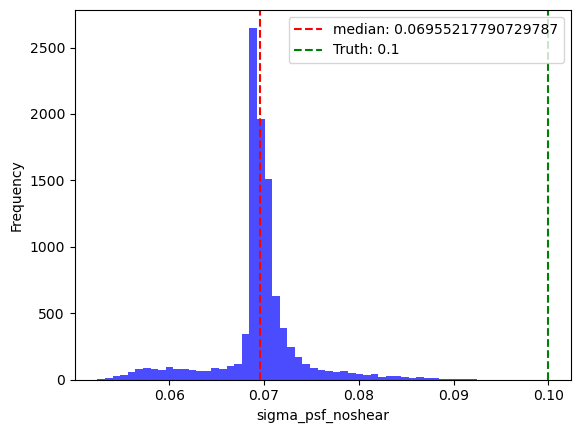

In [16]:
# Filter the data to exclude values greater than 1
filtered_data = np.sqrt(cat["Tpsf_noshear"]/2)
T_truth = 0.1
# Plot the histogram with the filtered data
plt.hist(filtered_data, bins=50, color='blue', alpha=0.7)
plt.axvline(x=np.median(filtered_data), color='red', linestyle='--', label=f'median: {np.median(filtered_data)}')
plt.axvline(x=T_truth, color='green', linestyle='--', label=f'Truth: {T_truth}')
plt.legend()
plt.xlabel("sigma_psf_noshear")
plt.ylabel("Frequency")
#plt.title("Histogram of Filtered Data (No Outliers > 1)")
plt.show()

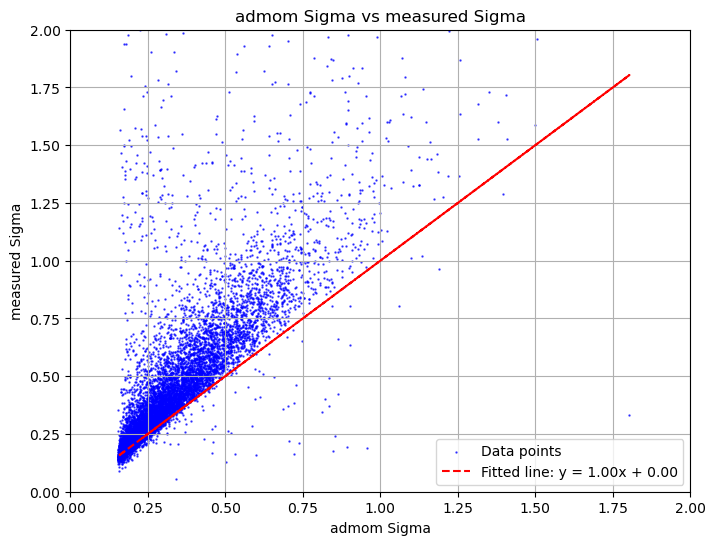

In [17]:
filtered_cat = cat[(cat['admom_flag'] == 1) & (cat['admom_sigma'] > 0.14)]
sigma_admom = filtered_cat[filtered_cat["T_noshear"]>0]['admom_sigma']
measured_sigma = np.sqrt(filtered_cat[filtered_cat["T_noshear"]>0]['T_noshear']/2)


# Fit a line to the data (1st degree polynomial)
coefficients = np.polyfit(sigma_admom, measured_sigma, 1)
slope, intercept = coefficients
slope, intercept = 1, 0
fit_line = slope * sigma_admom + intercept


# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(sigma_admom, measured_sigma, label='Data points', color='blue', alpha=0.7, s=0.5)

# Add y = x line
plt.plot(sigma_admom, fit_line, label=f'Fitted line: y = {slope:.2f}x + {intercept:.2f}', color='red', linestyle='--')

# Labels and title
plt.title('admom Sigma vs measured Sigma')
plt.xlabel('admom Sigma')
plt.ylabel('measured Sigma')

plt.xlim(0, 2.0)
plt.ylim(0, 2.0)

# Grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()